In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[]


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL #pillow to handle images
import tensorflow as tf

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/learning-datasets/horse-or-human.zip" #tgz = tar ball (just like zip file)

data_dir = tf.keras.utils.get_file('horse_or_human_photos', origin=dataset_url, untar=True)

In [4]:
data_dir

'C:\\Users\\hp r5\\.keras\\datasets\\horse_or_human_photos'

In [5]:
import os
os.listdir('C:\\Users\\hp r5\\.keras\\datasets\\horse_or_human_photos')

['horses', 'humans']

In [6]:
os.listdir('C:\\Users\\hp r5\\.keras\\datasets\\horse_or_human_photos\\horses'
)

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png',
 'horse02-0.png',
 'horse02-1.png',
 'horse02-2.png',
 'horse02-3.png',
 'horse02-4.png',
 'horse02-5.png',
 'horse02-6.png',
 'horse02-7.png',
 'horse02-8.png',
 'horse02-9.png',
 'horse03-0.png',
 'horse03-1.png',
 'horse03-2.png',
 'horse03-3.png',
 'horse03-4.png',
 'horse03-5.png',
 'horse03-6.png',
 'horse03-7.png',
 'horse03-8.png',
 'horse03-9.png',
 'horse04-0.png',
 'horse04-1.png',
 'horse04-2.png',
 'horse04-3.png',
 'horse04-4.png',
 'horse04-5.png',
 'horse04-6.png',
 'horse04-7.png',
 'horse04-8.png',
 'horse04-9.png',
 'horse05-0.png',
 'horse05-1.png',
 'horse05-2.png',
 'horse05-3.png',
 'horse05-4.png',
 'horse05-5.png',
 'horse05-6.png',
 'horse05-7.png',
 'horse05-8.png',
 'horse05-9.png',
 'horse06-0.png',
 'horse06-1.png',
 'horse06-2.png',
 'horse06-3.png',
 'horse06-4.png',
 'horse06-

In [7]:
len(os.listdir('C:\\Users\\hp r5\\.keras\\datasets\\horse_or_human_photos\\horses'
))

500

In [8]:
len(os.listdir('C:\\Users\\hp r5\\.keras\\datasets\\horse_or_human_photos\\humans'
))

527

In [9]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos')

In [10]:
from keras.layers import Dense,Flatten,Dropout
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img,array_to_img,img_to_array
from keras.models import Sequential
from glob import glob 

In [11]:
image_count=len(list(data_dir.glob('*/*.png')))

In [12]:
print(image_count)

1027


In [13]:
list(data_dir.glob('*'))

[WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans')]

In [14]:
list(data_dir.glob('horses/*'))

[WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-0.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-1.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-2.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-3.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-4.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-5.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-6.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-7.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-8.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse01-9.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/horses/horse02-0.png'),

In [15]:
list(data_dir.glob('humans/*'))

[WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-00.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-01.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-02.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-03.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-04.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-05.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-06.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-07.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-08.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-09.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human0

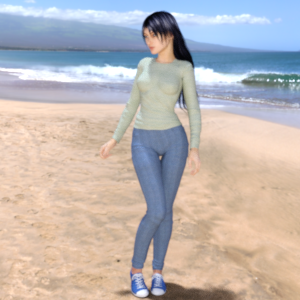

In [16]:
load_img('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-11.png')

In [17]:
human = list(data_dir.glob('humans/*.png'))
horse = list(data_dir.glob('horses/*.png'))

In [18]:
human

[WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-00.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-01.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-02.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-03.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-04.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-05.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-06.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-07.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-08.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-09.png'),
 WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human0

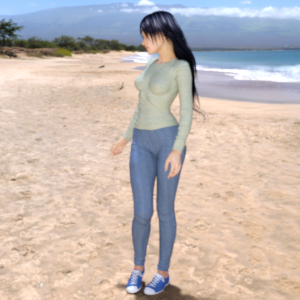

In [19]:
load_img('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-07.png')

In [20]:
human[21]

WindowsPath('C:/Users/hp r5/.keras/datasets/horse_or_human_photos/humans/human01-21.png')

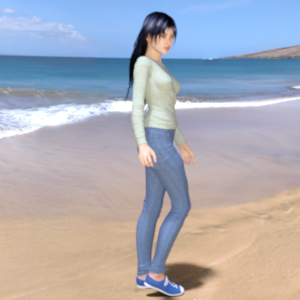

In [21]:
PIL.Image.open(str(human[21]))

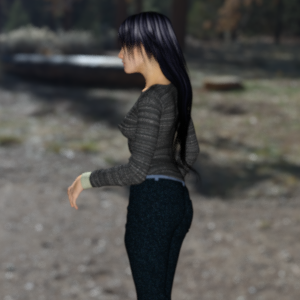

In [22]:
PIL.Image.open(str(human[34]))

In [23]:
batch_size = 30
epochs = 80
IMG_HIEGHT= 224
IMG_WIDHT= 224

In [24]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.3,
                                    validation_split=0.2)

In [25]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=data_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training')

Found 822 images belonging to 2 classes.


In [26]:
train_data_gen.class_indices

{'horses': 0, 'humans': 1}

In [27]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

In [28]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=data_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation')

Found 205 images belonging to 2 classes.


In [29]:
sample_img,label = next(train_data_gen)

In [30]:
sample_img.shape

(30, 224, 224, 3)

In [31]:
label

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [32]:
from keras.layers import Conv2D,MaxPooling2D,Dropout
model = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(256,activation='relu'),
    Dense(2,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        1

In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
filepath='predict_horse_human.h5'

In [35]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath=filepath,
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,
                            mode='min')

In [36]:
callbacks=[checkpoint]

In [37]:
history=model.fit(train_data_gen,validation_data=val_data_gen,epochs=epochs,verbose=2,callbacks=callbacks)

Epoch 1/80
28/28 - 58s - loss: 1.2216 - accuracy: 0.5864 - val_loss: 0.6621 - val_accuracy: 0.7854

Epoch 00001: val_loss improved from inf to 0.66208, saving model to predict_horse_human.h5
Epoch 2/80
28/28 - 49s - loss: 0.5809 - accuracy: 0.6727 - val_loss: 0.5362 - val_accuracy: 0.7171

Epoch 00002: val_loss improved from 0.66208 to 0.53622, saving model to predict_horse_human.h5
Epoch 3/80
28/28 - 48s - loss: 0.4573 - accuracy: 0.7908 - val_loss: 0.4763 - val_accuracy: 0.7268

Epoch 00003: val_loss improved from 0.53622 to 0.47631, saving model to predict_horse_human.h5
Epoch 4/80
28/28 - 49s - loss: 0.3760 - accuracy: 0.8114 - val_loss: 0.3667 - val_accuracy: 0.9073

Epoch 00004: val_loss improved from 0.47631 to 0.36670, saving model to predict_horse_human.h5
Epoch 5/80
28/28 - 51s - loss: 0.3534 - accuracy: 0.8443 - val_loss: 0.4782 - val_accuracy: 0.7756

Epoch 00005: val_loss did not improve from 0.36670
Epoch 6/80
28/28 - 49s - loss: 0.2931 - accuracy: 0.8698 - val_loss: 0.48

In [38]:
model = tf.keras.models.load_model('predict_horse_human.h5')

In [39]:
img = load_img('horse.jpg',target_size=(224,224))

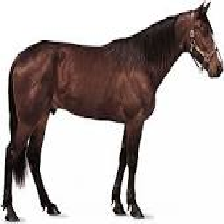

In [40]:
img

In [41]:
img_array = img_to_array(img)
img_array.shape

(224, 224, 3)

In [42]:
img_array = img_array.reshape(1,224, 224, 3)

In [43]:
img_array.shape

(1, 224, 224, 3)

In [44]:
class_name = ['horse','human']

In [45]:
model.predict(img_array)

array([[0., 1.]], dtype=float32)

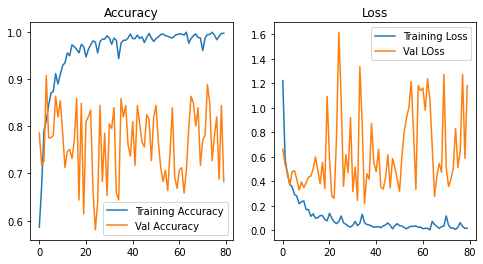

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc=0)
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [47]:
img = load_img('horse1.jpg',target_size=(224,224))

In [48]:
np.argmax(model.predict(img_array),axis=1)

array([1], dtype=int64)

In [49]:
np.argmax(model.predict(img_array),axis=1)[0]

1

In [50]:
class_name[np.argmax(model.predict(img_array),axis=1)[0]]

'human'

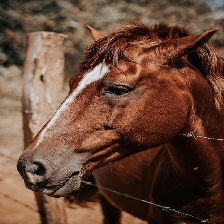

In [51]:
test_img=load_img('pexels-photo-1848725.jpeg',target_size=(224,224))
test_img

In [52]:
test_array =img_to_array(test_img)

In [53]:
test_array

array([[[ 14.,  16.,  13.],
        [ 12.,  14.,  11.],
        [ 13.,  15.,  12.],
        ...,
        [106., 139., 148.],
        [109., 130., 135.],
        [100., 118., 122.]],

       [[ 13.,  15.,  12.],
        [ 11.,  13.,  10.],
        [ 12.,  14.,  11.],
        ...,
        [110., 140., 150.],
        [110., 130., 139.],
        [101., 120., 127.]],

       [[ 14.,  16.,  11.],
        [ 14.,  16.,  11.],
        [ 14.,  16.,  11.],
        ...,
        [116., 140., 152.],
        [117., 135., 145.],
        [108., 125., 133.]],

       ...,

       [[150., 100.,  65.],
        [152., 102.,  67.],
        [153., 103.,  68.],
        ...,
        [ 43.,  14.,   6.],
        [ 42.,  15.,   6.],
        [ 42.,  15.,   6.]],

       [[144.,  94.,  61.],
        [144.,  94.,  61.],
        [144.,  94.,  61.],
        ...,
        [ 35.,  12.,   6.],
        [ 34.,  14.,   5.],
        [ 35.,  15.,   6.]],

       [[137.,  87.,  54.],
        [137.,  87.,  54.],
        [137.,  

In [54]:
test_array.shape

(224, 224, 3)

In [55]:
tst_array=test_array.reshape(1,224,224,3)

In [56]:
tst_array.shape

(1, 224, 224, 3)

In [57]:
model.predict(tst_array)

array([[0., 1.]], dtype=float32)